Creo un reticolo che voglio studiare con condizioni periodiche al contorno e senza. Il reticolo sarà formato celle quadrate, utilizzando RigidPy non è possibile utilizzare una sola cella quadrata perchè l'idea è quella di collegare gli estremi di un reticolo creando un toro, un tale collegamento è possibile se lungo un asse i nodi sono almeno tre.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import rigidpy as rp

In [32]:
coordinates = np.loadtxt("/Users/edoardonaggi/Desktop/TESI/Prova/coordinates7.txt")
temp = np.loadtxt("/Users/edoardonaggi/Desktop/TESI/Prova/bonds7.txt")
bonds = temp.astype(int)
print("Coordinate di ogni nodo: ")
print(coordinates)
print("Collegamenti tra i nodi numerati secondo sequenza: ")
print(bonds)

Coordinate di ogni nodo: 
[[0.1 0.1]
 [1.1 0.1]
 [2.1 0.1]
 [0.1 1.1]
 [1.1 1.1]
 [2.1 1.1]
 [0.1 2.1]
 [1.1 2.1]
 [2.1 2.1]]
Collegamenti tra i nodi numerati secondo sequenza: 
[[0 1]
 [1 2]
 [0 3]
 [1 4]
 [2 5]
 [3 4]
 [4 5]
 [3 6]
 [4 7]
 [8 5]
 [6 7]
 [7 8]]


Una volta caricate le coordinate non periodiche, creo il framework tenendo present che va inserita una base ossia due vettori (dato che siamo in due dimensioni) che contengano l'elemento da ripetersi, ossia quello disegnato.

[]


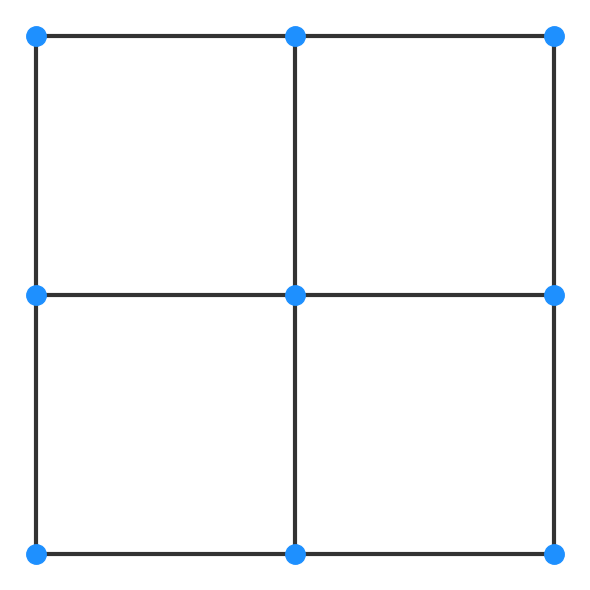

In [33]:
F= rp.framework(coordinates,bonds,basis=[[0,3],[3,0]])
F.visualize()

A questo punto printo la matrice hessiana da studiare con o senza condizioni periodiche

In [34]:
print(F.hessianMatrix())

[[ 1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  2.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  2.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.

E di questa calcolo autovettori e autovalori

In [35]:
Eigenvalues, Eigenvectors = F.eigenSpace(eigvals = None)
print("Autovalori della matrice: ")
print(Eigenvalues)
print("Autovettori della matrice: ")
print(Eigenvectors)

Autovalori della matrice: 
[2.66453526e-15 2.66453526e-15 2.66453526e-15 2.66453526e-15
 2.66453526e-15 2.66453526e-15 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 3.00000000e+00 3.00000000e+00 3.00000000e+00 3.00000000e+00
 3.00000000e+00 3.00000000e+00]
Autovettori della matrice: 
[[ 5.77350269e-01  0.00000000e+00  5.77350269e-01  0.00000000e+00
   5.77350269e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  5.77350269e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  5.77350269e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  5.77350269e-01
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.

Ora applico le condizioni periodiche al contorno ossia collego gli estremi della cella in modo da formare un toro

In [36]:
coordinates = np.loadtxt("/Users/edoardonaggi/Desktop/TESI/Prova/coordinates7.txt")
temp = np.loadtxt("/Users/edoardonaggi/Desktop/TESI/Prova/bonds7_pbc.txt")
bonds = temp.astype(int)
print("Coordinate di ogni nodo: ")
print(coordinates)
print("Collegamenti tra i nodi numerati secondo sequenza: ")
print(bonds)

Coordinate di ogni nodo: 
[[0.1 0.1]
 [1.1 0.1]
 [2.1 0.1]
 [0.1 1.1]
 [1.1 1.1]
 [2.1 1.1]
 [0.1 2.1]
 [1.1 2.1]
 [2.1 2.1]]
Collegamenti tra i nodi numerati secondo sequenza: 
[[0 1]
 [1 2]
 [0 3]
 [1 4]
 [2 5]
 [3 4]
 [4 5]
 [3 6]
 [4 7]
 [5 8]
 [6 7]
 [7 8]
 [0 2]
 [0 6]
 [1 7]
 [2 8]
 [3 5]
 [6 8]]


Ho aggiunto gli ultimi 6 bonds che rappresentano le PBC.

Rappresento la matrice hessiana

In [37]:
F_PBC= rp.framework(coordinates,bonds,basis=[[0,3],[3,0]])
print(F_PBC.hessianMatrix())

[[-3  0]
 [ 0 -3]
 [ 0 -3]
 [ 0 -3]
 [-3  0]
 [-3  0]]
[[ 2.  0. -1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [-1.  0.  2.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  2.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0. -1.  0.  0.]
 [-1.  0. -1.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.  2.  0. -1.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  2.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0. -1.  0.  2.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.

In [38]:
Eigenvalues_PBC, Eigenvectors_PBC = F_PBC.eigenSpace(eigvals = None)
print("Autovalori della matrice: ")
print(Eigenvalues_PBC)
print("Autovettori della matrice: ")
print(Eigenvectors_PBC)

Autovalori della matrice: 
[-2.66453526e-15 -1.33226763e-15  1.77635684e-15  1.77635684e-15
  2.22044605e-15  2.22044605e-15  3.00000000e+00  3.00000000e+00
  3.00000000e+00  3.00000000e+00  3.00000000e+00  3.00000000e+00
  3.00000000e+00  3.00000000e+00  3.00000000e+00  3.00000000e+00
  3.00000000e+00  3.00000000e+00]
Autovettori della matrice: 
[[ 0.00000000e+00  1.07423132e-17 -7.59596249e-18 -1.33638093e-17
   7.59596249e-18 -5.39471368e-17 -5.77350269e-01 -6.08823078e-17
  -5.77350269e-01 -6.27070344e-17 -5.77350269e-01  5.55111512e-17
   0.00000000e+00  5.01399946e-17  0.00000000e+00  7.60708437e-17
   0.00000000e+00 -5.55111512e-17]
 [ 0.00000000e+00  1.70013763e-18 -1.20217885e-18 -2.11503004e-18
   1.20217885e-18 -1.14983084e-18  1.68933692e-18  7.75211453e-18
  -1.44291239e-18 -9.58428336e-19 -2.46424529e-19 -2.21380093e-18
  -5.77350269e-01 -9.45225216e-18 -5.77350269e-01  3.07345837e-18
  -5.77350269e-01  3.36363176e-18]
 [ 0.00000000e+00 -7.85046229e-17  5.55111512e-17 -5.

In [39]:
print("Confronto autovalori")
print(Eigenvalues)
print(Eigenvalues_PBC)

Confronto autovalori
[2.66453526e-15 2.66453526e-15 2.66453526e-15 2.66453526e-15
 2.66453526e-15 2.66453526e-15 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 3.00000000e+00 3.00000000e+00 3.00000000e+00 3.00000000e+00
 3.00000000e+00 3.00000000e+00]
[-2.66453526e-15 -1.33226763e-15  1.77635684e-15  1.77635684e-15
  2.22044605e-15  2.22044605e-15  3.00000000e+00  3.00000000e+00
  3.00000000e+00  3.00000000e+00  3.00000000e+00  3.00000000e+00
  3.00000000e+00  3.00000000e+00  3.00000000e+00  3.00000000e+00
  3.00000000e+00  3.00000000e+00]
